In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.dates as mdates
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/tomiwa/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [2]:
# Load your cleaned data
df = pd.read_csv("/Users/tomiwa/Downloads/Cleaned_Reddit_Data.csv")

# Preview columns
print(df.columns)
df.head()

Index(['source', 'date', 'cleaned_text', 'score', 'url'], dtype='object')


,source,date,cleaned_text,score,url
0,reddit,2021-07-08 20:21:10,jagmeet singhs plan invest in building 500000 ...,1842,https://www.reddit.com/r/canadahousing/comment...
1,reddit,2024-12-14 09:36:37,canada economy in decline trying to save housi...,203,https://www.reddit.com/r/canadahousing/comment...
2,reddit,2023-07-20 15:58:58,unpopular opinion housing should not be an inv...,504,https://www.reddit.com/r/canadahousing/comment...
3,reddit,2021-06-20 13:47:06,people really arent angry enough about economi...,782,https://www.reddit.com/r/canadahousing/comment...
4,reddit,2025-01-16 06:28:14,why you should care about housing affordabilit...,191,https://www.reddit.com/r/canadahousing/comment...


In [3]:
df['date'] = pd.to_datetime(df['date'])

/var/folders/1v/t2nqbf2170s4f9z_0swmfcw00000gn/T/ipykernel_93243/3532345252.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'])


In [4]:
vader = SentimentIntensityAnalyzer()
df['compound_score'] = df['cleaned_text'].apply(lambda text: vader.polarity_scores(text)['compound'])

def classify_sentiment(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment'] = df['compound_score'].apply(classify_sentiment)

In [5]:
# Create 'month' column for grouping
df['month'] = df['date'].dt.to_period('M').astype(str)

In [6]:
# Count number of each sentiment per month
monthly_sentiment = df.groupby(['month', 'sentiment']).size().unstack(fill_value=0)

# Sort by date
monthly_sentiment = monthly_sentiment.sort_index()
monthly_sentiment.tail()

sentiment,Negative,Neutral,Positive
month,,,
2025-01,0,0,3
2025-02,0,0,1
2025-03,0,0,3
2025-04,1,0,2
2025-05,4,0,4


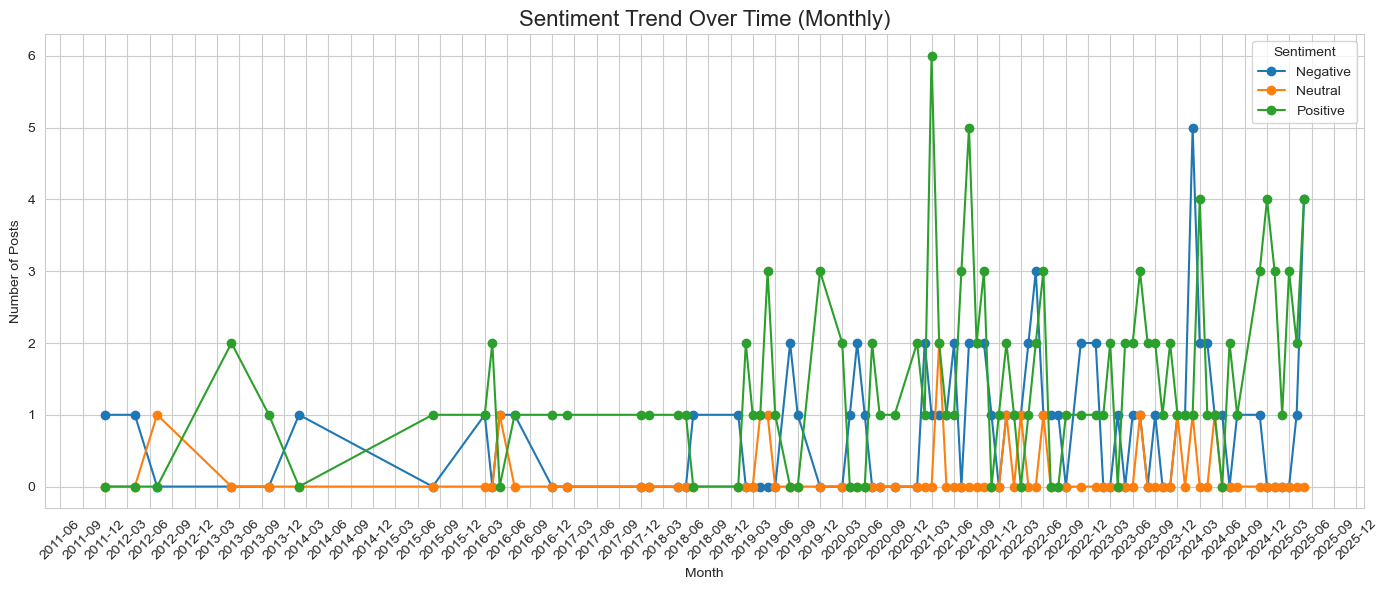

In [ ]:
monthly_sentiment.index = pd.to_datetime(monthly_sentiment.index)

plt.figure(figsize=(14, 6))
sns.set_style("whitegrid")

# Plot each sentiment line
for sentiment in monthly_sentiment.columns:
    plt.plot(monthly_sentiment.index, monthly_sentiment[sentiment], marker='o', label=sentiment)

# Format x-axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.xticks(rotation=45)

plt.title('Sentiment Trend Over Time (Monthly)', fontsize=16)
plt.xlabel('Month')
plt.ylabel('Number of Posts')
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()

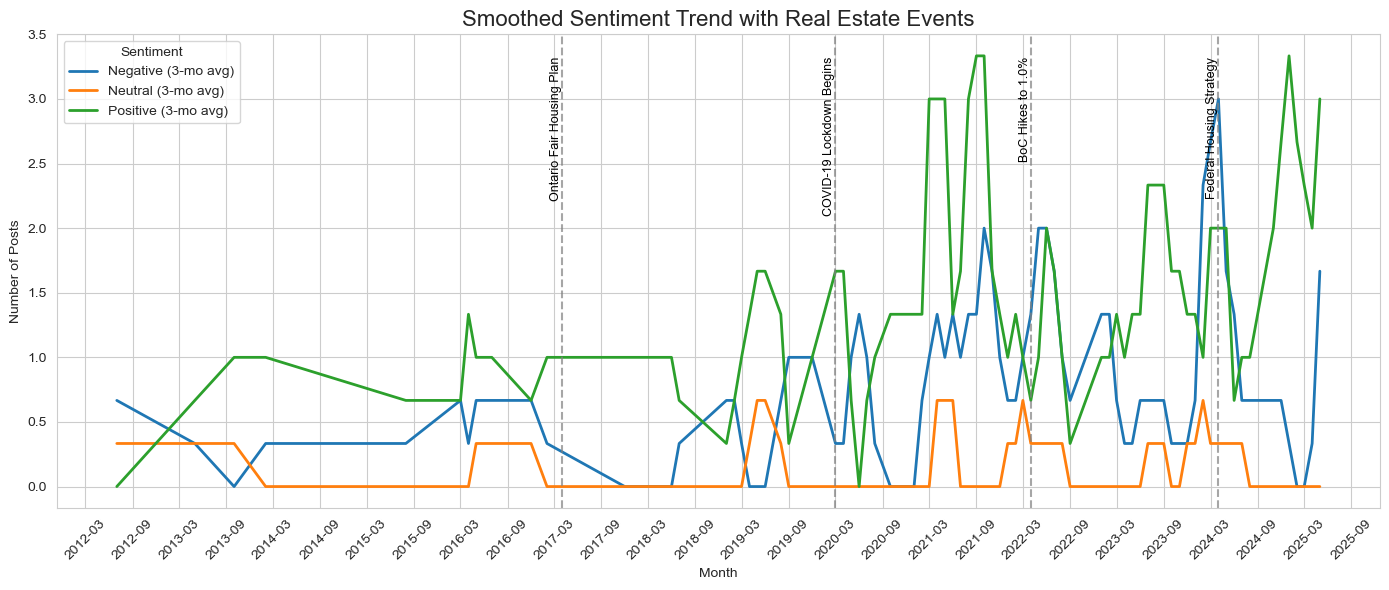

In [15]:
event_dates = pd.to_datetime(['2017-04', '2020-03', '2022-04', '2024-04'])
event_labels = [
    'Ontario Fair Housing Plan',
    'COVID-19 Lockdown Begins',
    'BoC Hikes to 1.0%',
    'Federal Housing Strategy'
]

plt.figure(figsize=(14, 6))
sns.set_style("whitegrid")

for sentiment in monthly_sentiment_smooth.columns:
    plt.plot(monthly_sentiment_smooth.index, monthly_sentiment_smooth[sentiment],
             label=f"{sentiment} (3-mo avg)", linewidth=2)

for i, date in enumerate(event_dates):
    plt.axvline(x=date, color='gray', linestyle='--', alpha=0.7)
    plt.text(date, plt.ylim()[1]*0.95, event_labels[i],
             rotation=90, va='top', ha='right', fontsize=9, color='black')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))
plt.xticks(rotation=45)
plt.title('Smoothed Sentiment Trend with Real Estate Events', fontsize=16)
plt.xlabel('Month')
plt.ylabel('Number of Posts')
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()

The chart above visualizes sentiment trends over time within Canadian Reddit conversations related to housing. A 3-month rolling average was applied to highlight overarching patterns while reducing short-term noise. Key real estate events were also added as vertical reference markers to help contextualize fluctuations in sentiment.

insights emerge:
	1. During April 2017, a notable shift in sentiment is visible around the period when Ontario introduced the Fair Housing Plan. The plan included rent control measures and a foreign buyer tax, which likely intensified public engagement and discussions about affordability.
	2. In early 2020, there’s a visible increase in conversation volume and varied sentiment polarity. This aligns with the onset of COVID-19 lockdowns in Canada, which drastically altered economic conditions, consumer uncertainty, and housing market behavior. Sentiment during this period reflects both concern and reassessment of long-term housing stability.
	3. In April 2022, the Bank of Canada’s interest rate hike to 1.0% marks the beginning of a monetary tightening cycle. Around this point, there is increased volatility in both negative and neutral sentiment, which may reflect public reaction to mortgage cost changes and market uncertainty.
	4. By April 2024, the announcement of a federal housing strategy appears alongside a gradual increase in sentiment activity. The plan, which proposed investments in affordable housing and tenant protections, may have triggered more constructive or policy-driven discussions across Reddit housing forums.

Overall, the trendline suggests that public discourse around housing in Canada is heavily responsive to policy announcements, macroeconomic shifts, and affordability measures. Rather than static opinions, the sentiment data reveals an evolving emotional landscape shaped by real-world developments. This has potential implications for policy timing, media framing, and understanding public trust in institutional responses to housing challenges.